In [ ]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [1]:
#Importing other libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Load the datafile 
dataset= pd.read_csv("/content/aps_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
dataset.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0


In [18]:
dataset.info(verbose=True,show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    class   5000 non-null   object
 1    aa_000  5000 non-null   int64 
 2    ab_000  1151 non-null   object
 3    ac_000  4692 non-null   object
 4    ad_000  3764 non-null   object
 5    ae_000  4776 non-null   object
 6    af_000  4776 non-null   object
 7    ag_000  4942 non-null   object
 8    ag_001  4942 non-null   object
 9    ag_002  4942 non-null   object
 10   ag_003  4942 non-null   object
 11   ag_004  4942 non-null   object
 12   ag_005  4942 non-null   object
 13   ag_006  4942 non-null   object
 14   ag_007  4942 non-null   object
 15   ag_008  4942 non-null   object
 16   ag_009  4942 non-null   object
 17   ah_000  4940 non-null   object
 18   ai_000  4944 non-null   object
 19   aj_000  4944 non-null   object
 20   ak_000  4616 non-null   object
 21   al_000  4935 non-null   object
 22 

In [6]:
#Fetching all null values and we get none as we have na in our data values instead of 0
dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0     False   False   False   False   False   False   False   False   False   
1     False   False   False   False   False   False   False   False   False   
2     False   False   False   False   False   False   False   False   False   
3     False   False   False   False   False   False   False   False   False   
4     False   False   False   False   False   False   False   False   False   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
4995  False   False   False   False   False   False   False   False   False   
4996  False   False   False   False   False   False   False   False   False   
4997  False   False   False   False   False   False   False   False   False   
4998  False   False   False   False   False   False   False   False   False   
4999  False   False   False   False   False   False   False   False  

In [7]:
#replacing all na with nan
dataset= dataset.replace("na",np.nan)

In [11]:
dataset.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,NaN,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,NaN,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,NaN,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [12]:
# It gives the option to display number of rows mentioned in the parameter
pd.options.display.max_rows = 1000

In [13]:
#After replacing na with NAN, we are finding all null values in the dataset
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [14]:
#Counting Total fields with Null values

dataset.isnull().sum().sum()

71649

In [15]:
# Renaming dataset column 0 with "Null Value Count" name and sorting in Descending order

pd.DataFrame(dataset.isnull().sum().sort_values(ascending = False)).rename(columns ={0:"Null Value Count"} )

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [21]:
#replacing all NA values with median values of each columns, except the 'class' column, thereby we are left with no Null values

for feature in [feature for feature in dataset.columns if feature not in ['class']]:
    dataset[feature]=dataset[feature].fillna(dataset[feature].median())


In [22]:
# Checking if we still have any null values. 
dataset.isnull().sum().sum()

0

In [23]:
dataset.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [27]:
# Copy all columns except Class column in  dataset 'X'

X= dataset.drop("class", axis = 1)
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,31394,0.0,0,136.0,0,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,1598,0.0,0,136.0,0,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,42,2,2130706454,56,0,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,32752,0.0,0,136.0,0,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [33]:
# Storing class column in y dataset

y = dataset["class"]
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
4995    neg
4996    neg
4997    neg
4998    neg
4999    neg
Name: class, Length: 5000, dtype: object

In [34]:
# Checking shape of Y
y.shape

(5000,)

In [29]:
#checking information of X dataset

X.info(verbose=True,show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [36]:
y= pd.get_dummies(y,drop_first= True)
y

,neg,pos
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4995,1,0
4996,1,0
4997,1,0
4998,1,0


In [37]:
y.shape

(5000, 2)

In [44]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 2)
(1000, 2)


In [47]:
#applying fit_transform() on train dataset and only transform on test data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 2)
(1000, 2)


In [49]:
# Importing the Keras libraries and packages

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [51]:
#Creating sequential model

classifier_model = Sequential()

# Units = Number of neuron in Hiddern layer
# Input_dim = number of columns in input dataset
# Kernel_initializer =  used to initialize Weight and Bias 
# activation = which activation is user while forward propagation

classifier_model.add(Dense(units=10, kernel_initializer='he_uniform',activation='relu', input_dim=170))
classifier_model.add(Dense(units=10, kernel_initializer='he_uniform',activation='relu'))
classifier_model.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
# compilation of model


# Loss = to calculate loss function
# Optimizer for backward propagation
# compilation is done using metrics parameter

classifier.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Dense_1 = First hidden layer
#Dense_2 = Second hidder layer
#Dense_3 = Output layer

# Dense_1 param = no of columns * no of neurons in Hiddern layer 1 + Bias 
# ie  170 *10 +10 = 1710

# Dense_2 param = no of columns * no of neurons in Hiddern layer 2 + Bias 
# ie  10 *10 +10 = 110

# Dense_3 param = no of columns * no of neurons in Hiddern layer 1 + Bias 
# ie 1*10 +1 = 11

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1710      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model

# 1 epoch= 10 iteration
# 4000/10 = 400 data is send in each iteration of Epoch

model_history= classifier.fit(X_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2387 - accuracy: 0.9300
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9835
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9875
Epoch 4/20
400/400 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9898
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.0241 - accuracy: 0.9912
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.0199 - accuracy: 0.9930
Epoch 8/20
400/400 [==============================] - 2s 5ms/step - loss: 0.0181 - accuracy: 0.9927
Epoch 9/20
400/400 [==============================] - 2s 5ms/step - loss: 0.0162 - accuracy: 0.9933
Epoch 10/20
400/400 [==============================] - 2s 5ms/step - loss: 0.0149 - accuracy: 0.9948

In [ ]:
# Training the model with validation data set of 25

# 25% of 4000 is 1000 which is removed from the X_train dataset for validation
# 1 epoch= 10 interation
# 3000/10 = 300 data is send in each iteration of Epoch

model_history= classifier.fit(X_train,y_train,batch_size=10,epochs=20,validation_split= 0.25)

Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 0.9970 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.9973 - val_loss: 0.0054 - val_accuracy: 0.9980
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0059 - val_accuracy: 0.9970
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.9970 - val_loss: 0.0052 - val_accuracy: 0.9960
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9980 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 6/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0056 - val_accuracy: 0.9970
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9973 - val_loss: 0.0061 - val_accuracy: 0.9970
Epoch 

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model_history.history['accuracy']

[0.996999979019165,
 0.9973333477973938,
 0.9973333477973938,
 0.996999979019165,
 0.9980000257492065,
 0.9986666440963745,
 0.9973333477973938,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.996999979019165,
 0.9976666569709778,
 0.9990000128746033,
 0.9993333220481873,
 0.9986666440963745,
 0.9986666440963745,
 0.999666690826416,
 0.9993333220481873,
 0.999666690826416,
 0.9993333220481873]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


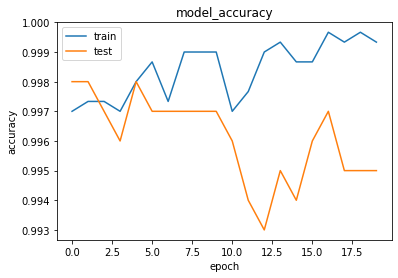

In [ ]:
#summarize history 
print(model_history.history.keys())

#summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc= 'upper left')
plt.show()

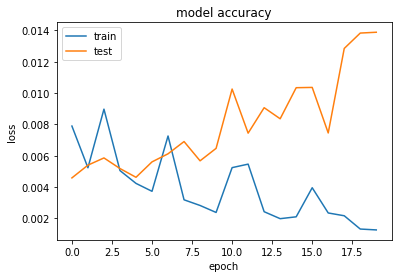

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# predicting value of y using test data of X

y_pred=classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
#checking and strping all y_predicted value which are are greater than 50%
# for sigmoid threhold is 0

y_pred = y_pred > 0.5

In [ ]:
y_pred.shape

(1000, 1)

In [ ]:
y_test.shape

(1000, 1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[976,  10],
       [  4,  10]])

In [ ]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [ ]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_01_21_18_39_22_.h5


In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:
# creating a function to build a model 

def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
# calling random_search function with  build_model parameters
tuner = RandomSearch(build_model,objective='val_accuracy', max_trials = 5, directory = 'project',project_name = 'aps-fault')

In [ ]:
tuner.search(X_train,y_train,validation_data= (X_test,y_test),epochs = 5)

In [ ]:
# It will give best hyperparameters
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [ ]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [ ]:
tuner_second.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.9890000224113464

Best val_accuracy So Far: 0.9890000224113464
Total elapsed time: 00h 01m 07s


In [ ]:
tuner_second.get_best_hyperparameters()[0].values